In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np

from transformers_simple.transformer import GPT
from transformers_simple.train import Trainer
from transformers_simple.dataset import CharDataset
from transformers_simple.char_util import generate_sample

In [2]:
N = 4
block_size  = 128
embed_size  = 256
hidden_size = 64
attn_hidden_size = 32
num_heads   = 3
vocab_size  = 39
output_size = vocab_size
num_transformer_blocks = 4

log_interval = 100
epochs = 1
learning_rate = 5e-4
device = torch.device('cpu')

In [3]:
dataset = CharDataset(filename="../datasets/shakespeare.txt", block_size=block_size)

In [4]:
dataset.vocab_size

39

In [5]:
dataset.length

1115394

In [6]:
net = GPT(vocab_size=vocab_size, 
          block_size=block_size,
          embed_size=embed_size,
          hidden_size=hidden_size,
          attn_hidden_size=attn_hidden_size,
          output_size=output_size,
          num_transformer_blocks=num_transformer_blocks,
          num_heads=num_heads,
         attn_dropout=0.2,
          attn_block_dropout=0.2,
         attn_residual_dropout=0.2,
         embed_dropout=0.2)

In [7]:
x = dataset[0][0].view(1,-1)

In [8]:
x

tensor([[18, 21, 30, 31, 32,  1, 15, 21, 32, 21, 38, 17, 26, 10,  0, 14, 17, 18,
         27, 30, 17,  1, 35, 17,  1, 28, 30, 27, 15, 17, 17, 16,  1, 13, 26, 37,
          1, 18, 33, 30, 32, 20, 17, 30,  6,  1, 20, 17, 13, 30,  1, 25, 17,  1,
         31, 28, 17, 13, 23,  8,  0,  0, 13, 24, 24, 10,  0, 31, 28, 17, 13, 23,
          6,  1, 31, 28, 17, 13, 23,  8,  0,  0, 18, 21, 30, 31, 32,  1, 15, 21,
         32, 21, 38, 17, 26, 10,  0, 37, 27, 33,  1, 13, 30, 17,  1, 13, 24, 24,
          1, 30, 17, 31, 27, 24, 34, 17, 16,  1, 30, 13, 32, 20, 17, 30,  1, 32,
         27,  1]])

In [9]:
loss = torch.nn.CrossEntropyLoss()

def loss_fn(o,y):
    #return loss(o.view(-1,vocab_size),y.view(-1))

    return loss(o[:,-1],y[:,-1])

In [10]:
trainer = Trainer(model=net, 
                  dataset=dataset, 
                  loss_fn=loss_fn, 
                  batch_size=N, 
                  learning_rate=learning_rate,
                  epochs=epochs, 
                  log_interval=log_interval, 
                  device=device,
                 max_iters=3e4)

In [11]:
trainer.run()

Train Epoch: 0 [0/1115266 (0%)]	Loss: 4.029171
Train Epoch: 0 [400/1115266 (0%)]	Loss: 2.551427
Train Epoch: 0 [800/1115266 (0%)]	Loss: 2.939942
Train Epoch: 0 [1200/1115266 (0%)]	Loss: 2.809117
Train Epoch: 0 [1600/1115266 (0%)]	Loss: 3.313325
Train Epoch: 0 [2000/1115266 (0%)]	Loss: 2.578384
Train Epoch: 0 [2400/1115266 (0%)]	Loss: 2.490086
Train Epoch: 0 [2800/1115266 (0%)]	Loss: 4.124276
Train Epoch: 0 [3200/1115266 (0%)]	Loss: 1.936540
Train Epoch: 0 [3600/1115266 (0%)]	Loss: 3.491215
Train Epoch: 0 [4000/1115266 (0%)]	Loss: 2.583754
Train Epoch: 0 [4400/1115266 (0%)]	Loss: 3.316289
Train Epoch: 0 [4800/1115266 (0%)]	Loss: 3.995570
Train Epoch: 0 [5200/1115266 (0%)]	Loss: 2.750134
Train Epoch: 0 [5600/1115266 (1%)]	Loss: 3.392050
Train Epoch: 0 [6000/1115266 (1%)]	Loss: 2.737354
Train Epoch: 0 [6400/1115266 (1%)]	Loss: 2.986580
Train Epoch: 0 [6800/1115266 (1%)]	Loss: 2.263286
Train Epoch: 0 [7200/1115266 (1%)]	Loss: 3.191315
Train Epoch: 0 [7600/1115266 (1%)]	Loss: 2.338708
Train

Train Epoch: 0 [64800/1115266 (6%)]	Loss: 2.681271
Train Epoch: 0 [65200/1115266 (6%)]	Loss: 2.240578
Train Epoch: 0 [65600/1115266 (6%)]	Loss: 2.328568
Train Epoch: 0 [66000/1115266 (6%)]	Loss: 1.948813
Train Epoch: 0 [66400/1115266 (6%)]	Loss: 2.614131
Train Epoch: 0 [66800/1115266 (6%)]	Loss: 2.577092
Train Epoch: 0 [67200/1115266 (6%)]	Loss: 1.446646
Train Epoch: 0 [67600/1115266 (6%)]	Loss: 1.648637
Train Epoch: 0 [68000/1115266 (6%)]	Loss: 2.364445
Train Epoch: 0 [68400/1115266 (6%)]	Loss: 3.057054
Train Epoch: 0 [68800/1115266 (6%)]	Loss: 1.656433
Train Epoch: 0 [69200/1115266 (6%)]	Loss: 2.558351
Train Epoch: 0 [69600/1115266 (6%)]	Loss: 2.782040
Train Epoch: 0 [70000/1115266 (6%)]	Loss: 2.336202
Train Epoch: 0 [70400/1115266 (6%)]	Loss: 3.029612
Train Epoch: 0 [70800/1115266 (6%)]	Loss: 2.752434
Train Epoch: 0 [71200/1115266 (6%)]	Loss: 2.307096
Train Epoch: 0 [71600/1115266 (6%)]	Loss: 2.490721
Train Epoch: 0 [72000/1115266 (6%)]	Loss: 3.758995
Train Epoch: 0 [72400/1115266 (

In [12]:
x = dataset[1][0].view(1,-1)

o = net(x)

In [13]:
o.size()

torch.Size([1, 128, 39])

In [14]:
torch.nn.functional.softmax(o[0,-1], dim=0)

tensor([1.2967e-02, 5.6180e-01, 1.0839e-03, 4.8580e-10, 4.1638e-13, 1.8143e-03,
        4.4672e-02, 7.7593e-04, 1.0225e-02, 3.5543e-08, 4.3323e-03, 4.9813e-03,
        1.4346e-03, 1.8303e-02, 4.0991e-04, 1.9277e-04, 1.8844e-03, 9.9918e-02,
        2.1693e-03, 3.3147e-04, 6.3032e-04, 3.4195e-02, 2.1035e-05, 2.2823e-04,
        4.1109e-03, 1.4668e-03, 1.6596e-03, 1.1812e-01, 3.4298e-04, 7.1033e-06,
        5.7440e-03, 1.6528e-02, 4.3169e-03, 3.4138e-02, 1.0526e-03, 1.8842e-03,
        8.4421e-06, 8.2558e-03, 2.4104e-06], grad_fn=<SoftmaxBackward0>)

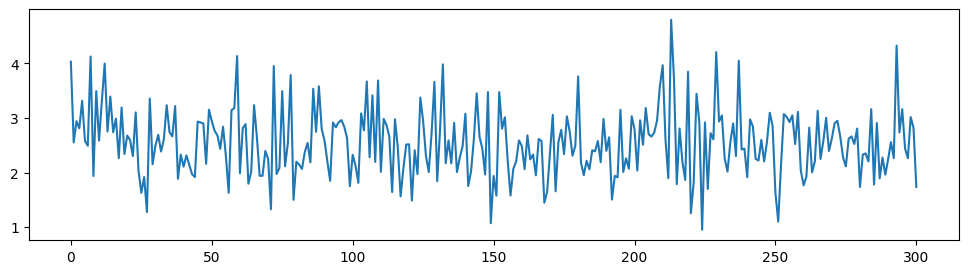

In [15]:
loss_history = trainer.loss_history

plt.figure(figsize=(12,3))
plt.plot(loss_history)
plt.show()

In [16]:
T = 200

x = dataset.data[100:100+block_size]
x = [dataset.char_to_index[c] for c in x]
print(x)
def net_out(x):
    o = net(x)
    return o[:,-1]

o = generate_sample(x, net_out, length=T)

[1, 13, 30, 17, 1, 13, 24, 24, 1, 30, 17, 31, 27, 24, 34, 17, 16, 1, 30, 13, 32, 20, 17, 30, 1, 32, 27, 1, 16, 21, 17, 1, 32, 20, 13, 26, 1, 32, 27, 1, 18, 13, 25, 21, 31, 20, 12, 0, 0, 13, 24, 24, 10, 0, 30, 17, 31, 27, 24, 34, 17, 16, 8, 1, 30, 17, 31, 27, 24, 34, 17, 16, 8, 0, 0, 18, 21, 30, 31, 32, 1, 15, 21, 32, 21, 38, 17, 26, 10, 0, 18, 21, 30, 31, 32, 6, 1, 37, 27, 33, 1, 23, 26, 27, 35, 1, 15, 13, 21, 33, 31, 1, 25, 13, 30, 15, 21, 33, 31, 1, 21, 31, 1, 15, 20, 21, 17, 18]


In [17]:
o = [dataset.index_to_char[c] for c in o]

In [18]:
"".join(o)

'ofuled hitthe bey a--wise att t halalomangine wist hancoto figomyorose moumense n qur fertounchoml iindalo allollandsotoowwiory ome ntor shin:\n\nig t this an thes, h \nfi s ind be the, mvithes per,\nmair'